In [949]:
import pandas as pd

In [950]:
df = pd.read_csv('data.csv')
df = df.reset_index(drop=True)
mileage = 24
mileage
real_price = df['price'][0]
df.describe()


,km,price
count,24.000000,24.000000
mean,101066.250000,6331.833333
std,52674.245606,1319.654193
min,22899.000000,3650.000000
25%,65020.500000,5687.500000
50%,83014.500000,6495.000000
75%,140975.000000,7115.000000
max,240000.000000,8290.000000


In [951]:
def estimate_price(mileage, theta0, theta1):
    estimate_price = theta0 + theta1 * mileage
    return estimate_price

price_estimation = estimate_price(61789, 9000, -0.023)
price_estimation

7578.853

In [952]:
def get_errors(data, theta0, theta1):
	errors = []
	for _, row in data.iterrows():
		price_estimation = estimate_price(row['km'], theta0, theta1)
		errors.append(price_estimation - row['price'])
	return errors

errors = get_errors(df, 1, 1)
print(errors)
print(sum(errors))

[np.int64(236351), np.int64(136001), np.int64(146101), np.int64(181081), np.int64(170751), np.int64(109451), np.int64(161001), np.int64(83011), np.int64(138502), np.int64(77801), np.int64(75640), np.int64(56671), np.int64(67401), np.int64(90701), np.int64(60201), np.int64(69126), np.int64(41336), np.int64(86011), np.int64(53460), np.int64(58120), np.int64(46011), np.int64(60511), np.int64(14910), np.int64(53500)]
2273650


In [953]:
import numpy as np

X = df['km'].values.astype(float)
Y = df['price'].values.astype(float)

# X_mean, X_std = X.mean(), X.std()
# X_scaled = (X - X_mean) / X_std
# X_scaled = X / 10000
# Y_scaled = Y / 10000

# Y_scaled = Y
# X_scaled = X

In [954]:
def adjust_theta0(learning_rate, errors):
	error_sum = sum(errors)
	return learning_rate * (1 / len(errors)) * error_sum

print(adjust_theta0(1, errors))
print(sum(errors) / len(errors))

print(sum(df['price'])/len(df['price']))

def adjust_theta1(learning_rate, errors, data):
	weighted_error_sum = 0
	for index, error in enumerate(errors):
		weighted_error_sum += error * data[index]
	return learning_rate * (1 / len(errors)) * weighted_error_sum

print(adjust_theta1(1, errors, X))

94735.41666666666
94735.41666666667
6331.833333333333
12290554240.416666


In [ ]:
theta0 = 0
theta1 = 0
theta0_hist = []
theta1_hist = []

learning_rate_theta1 = 0.00000000001
learning_rate_theta0 = 0.01

mileage = 240000

for step in range(5000):
	errors = get_errors(df, theta0, theta1)
	# print(f"errors: {errors}")
	theta0 -= adjust_theta0(learning_rate_theta0, errors)
	theta1 -= adjust_theta1(learning_rate_theta1, errors, X)
	# print(f"theta0: {theta0}")
	# print(f"theta1: {theta1}")
	theta0_hist.append(theta0)
	theta1_hist.append(theta1)
	# price_estimation = estimate_price(mileage, theta0, theta1)
	# print(f"price estimation: {price_estimation}\n")
	

# print(f"theta0 series: {theta0_hist}")
# print(f"theta1 series: {theta1_hist}")


In [963]:
index =5
print(estimate_price(df['km'][index], theta0, theta1))
print(df['km'][index])
print(df['price'][index])

6037.258629605791
114800
5350


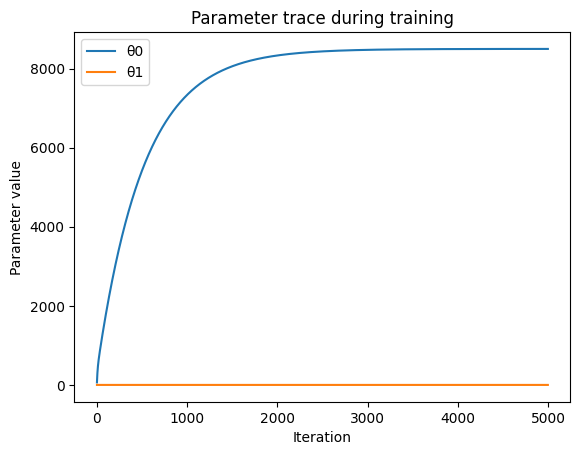

In [957]:
import matplotlib.pyplot as plt

plt.plot(theta0_hist, label="θ0")
plt.plot(theta1_hist, label="θ1")
plt.xlabel("Iteration")
plt.ylabel("Parameter value")
plt.title("Parameter trace during training")
plt.legend()
plt.show()


8499.114139501155 -0.021445093505184455


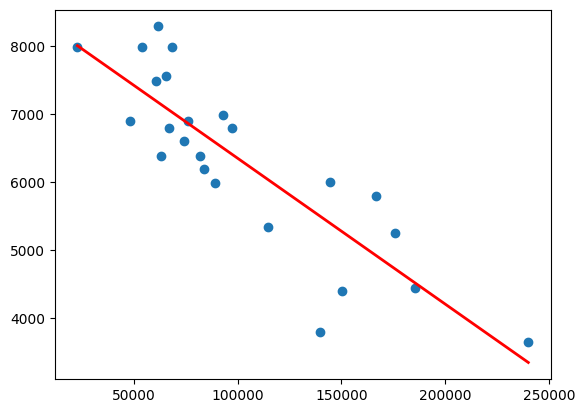

In [958]:
print(theta0, theta1)
plt.scatter(df['km'], df['price'], )
x_line = np.array([df['km'].min(), df['km'].max()])
y_line = theta0 + theta1 * x_line
plt.plot(x_line, y_line,
		linewidth=2,
		color='red',
		label='y = 9000 + 0.02·x')
plt.show()


8499.59964993322 -0.02144896359170234


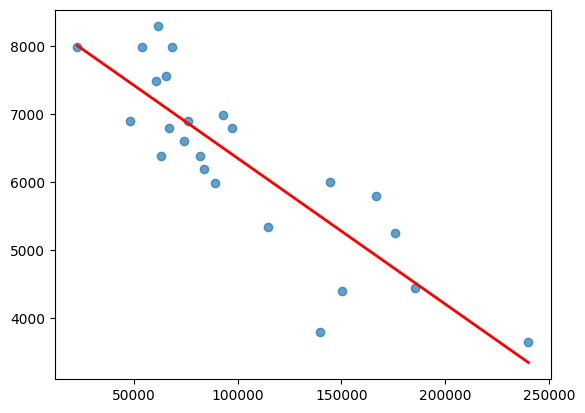

In [959]:
theta1, theta0 = np.polyfit(df['km'], df['price'], 1)
print(theta0, theta1)

x_line = np.array([df["km"].min(), df["km"].max()])
y_line = theta0 + theta1 * x_line
plt.scatter(df["km"], df["price"], label="data", alpha=.7)
plt.plot(x_line, y_line, color="red", linewidth=2,
         label=f"ŷ = {theta0:.0f} {theta1:+.3f}·x")
plt.show()